# Evaluate a Model's Classifications

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [45]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/KiTH_Solutions/Research/Clinical Trial/study_metadata/all_performances.xlsx'
sheet = 'roca'

In [46]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/roca/figures/cognitive_classifier'


In [47]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,Measurement,Cohort,Educational_Status_Coded,Educational_Status,Employment_Status,Randomization_Group_Coded,Age,Sex_Coded,Sex,Ethnicity_Coded,...,Cube_Actual,Infinity_Actual,Clock_Actual,cube_prediction,infinity_prediction,clock_prediction,cube_actual,infinity_actual,clock_actual,Classification
0,patient_15,1,1,Secondary,Unemployed,1.0,42,0,Female,1,...,Correct,Incorrect,Correct,1,0,1,1,0,1,0
1,patient_17,1,1,Secondary,Employed,1.0,35,1,Male,1,...,Incorrect,Incorrect,Incorrect,0,0,0,0,0,0,0
2,patient_19,1,1,Secondary,Unemployed,1.0,71,0,Female,1,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
3,patient_25,1,1,Secondary,Employed,1.0,53,0,Female,1,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
4,patient_26,1,2,Post-Secondary,Employed,1.0,49,0,Female,0,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
5,patient_40,1,1,Secondary,Employed,1.0,51,1,Male,0,...,Correct,Correct,Correct,1,1,1,1,1,1,1
6,patient_42,1,1,Secondary,Employed,1.0,46,1,Male,1,...,Correct,Correct,Correct,1,1,1,1,1,1,1
7,patient_47,1,1,Secondary,Employed,1.0,37,1,Male,1,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
8,patient_108,2,1,Secondary,Unemployed,1.0,35,0,Female,0,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
9,patient_109,2,3,Post-Secondary,Employed,1.0,41,0,Female,0,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0


In [48]:
data_df = data_df.fillna(value=1)
data_df

,Measurement,Cohort,Educational_Status_Coded,Educational_Status,Employment_Status,Randomization_Group_Coded,Age,Sex_Coded,Sex,Ethnicity_Coded,...,Cube_Actual,Infinity_Actual,Clock_Actual,cube_prediction,infinity_prediction,clock_prediction,cube_actual,infinity_actual,clock_actual,Classification
0,patient_15,1,1,Secondary,Unemployed,1.0,42,0,Female,1,...,Correct,Incorrect,Correct,1,0,1,1,0,1,0
1,patient_17,1,1,Secondary,Employed,1.0,35,1,Male,1,...,Incorrect,Incorrect,Incorrect,0,0,0,0,0,0,0
2,patient_19,1,1,Secondary,Unemployed,1.0,71,0,Female,1,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
3,patient_25,1,1,Secondary,Employed,1.0,53,0,Female,1,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
4,patient_26,1,2,Post-Secondary,Employed,1.0,49,0,Female,0,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
5,patient_40,1,1,Secondary,Employed,1.0,51,1,Male,0,...,Correct,Correct,Correct,1,1,1,1,1,1,1
6,patient_42,1,1,Secondary,Employed,1.0,46,1,Male,1,...,Correct,Correct,Correct,1,1,1,1,1,1,1
7,patient_47,1,1,Secondary,Employed,1.0,37,1,Male,1,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
8,patient_108,2,1,Secondary,Unemployed,1.0,35,0,Female,0,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0
9,patient_109,2,3,Post-Secondary,Employed,1.0,41,0,Female,0,...,Incorrect,Correct,Correct,0,1,1,0,1,1,0


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [49]:
data_df.columns

Index(['Measurement', 'Cohort', 'Educational_Status_Coded',
       'Educational_Status', 'Employment_Status', 'Randomization_Group_Coded',
       'Age', 'Sex_Coded', 'Sex', 'Ethnicity_Coded', 'Ethnicity',
       'Cognitive_Exam', 'Cognitive_Status', 'Cognitive_Status_Code',
       'Question_16', 'Convolutional_Neural_Network_Equivalent',
       'Weighted_Sum', 'Cube_Predicted', 'Infinity_Predicted',
       'Clock_Predicted', 'Cube_Actual', 'Infinity_Actual', 'Clock_Actual',
       'cube_prediction', 'infinity_prediction', 'clock_prediction',
       'cube_actual', 'infinity_actual', 'clock_actual', 'Classification'],
      dtype='object')

In [50]:
drop_list = ['Age', 'Z_Scored_Percent_Cognitive_Improvement']

In [51]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

KeyError: ['Z_Scored_Percent_Cognitive_Improvement']

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [ ]:
data_df.columns

Set the parameters for dropping rows

In [ ]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below')
value = 3  # The value to compare against

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Descriptive Stats

In [ ]:
data_df.describe()

Rename Columns

In [53]:
# Rename columns
data_df.rename(columns={
    'cube_prediction': 'Cube Prediction',
    'infinity_prediction': 'Infinity Prediction',
    'clock_prediction': 'Clock Prediction',
    'cube_actual': 'Cube Actual',
    'infinity_actual': 'Infinity Actual',
    'clock_actual': 'Clock Actual',
    'Cognitive_Status_Code': 'Cognitively Intact',
    'Cognitive_Status': 'Cognitive Status',
    'Question_16': 'RoCA Score'
}, inplace=True)

# 02 - Evaluate Already Administered Classifications

How to Use the Mapping Dictionary
- The mapping dictionary is a crucial component of the BinaryDataMetricsPlotter class. It defines the relationships between columns in your dataframe that you want to compare. Here's how to use it:

- Define the Mapping: Create a dictionary where each key-value pair represents a mapping of the columns of ground-truth classification to the column of the experimental classificaiton. 

>mapping_dict = {
>>    'gold_standard_1': 'classification_1',
>>
>>    'gold_standard_2': 'classification_2',
>>
>>    add more as needed
>>
>}

**The mapping dict must have gold standards as keys**

In [ ]:
data_df.columns

In [14]:
mapping_dict = {'Cognitively Impaired':'Classification'}





**Visualize Classification Metrics with Barplots**

- Sensitivity (Recall): Measures the proportion of actual positives correctly identified. Identical to recall, it assesses how well the model identifies true positives among the positive cases.

- Specificity: Indicates the proportion of actual negatives correctly identified as such. It evaluates the model's ability to recognize true negatives among negative cases.

- Precision: Refers to the proportion of positive identifications that are actually correct. It focuses on the accuracy of the positive predictions made by the model.

- Recall: Measures the proportion of actual positives that are correctly identified. This is identical to sensitivity, emphasizing the model's accuracy in detecting positive cases.

- Accuracy: The ratio of correctly predicted observations to the total observations. It provides an overall measure of the model's performance.

- F1 Score: The harmonic mean of precision and recall. This metric is particularly useful when the balance between precision and recall is important.

- Positive Predictive Value (PPV): Similar to precision, PPV is the proportion of positive test results that are true positives. It indicates the likelihood that a positive test accurately reflects the underlying condition.

- Negative Predictive Value (NPV): The proportion of negative test results that are true negatives. NPV measures the likelihood that a negative test result accurately indicates the absence of the condition.

In [55]:
import numpy as np
data_df['Cognitively Impaired'] = np.where(data_df['Cognitively Intact']==1, 0, 1)
data_df['Classification'] = np.where(data_df['Classification']==1, 0, 1)

In [13]:
data_df

,Measurement,Cohort,Educational_Status_Coded,Educational_Status,Employment_Status,Randomization_Group_Coded,Age,Sex_Coded,Sex,Ethnicity_Coded,...,Infinity_Actual,Clock_Actual,Cube Prediction,Infinity Prediction,Clock Prediction,Cube Actual,Infinity Actual,Clock Actual,Classification,Cognitively Impaired
0,patient_15,1,1,Secondary,Unemployed,1.0,42,0,Female,1,...,Incorrect,Correct,1,0,1,1,0,1,1,1
1,patient_17,1,1,Secondary,Employed,1.0,35,1,Male,1,...,Incorrect,Incorrect,0,0,0,0,0,0,1,1
2,patient_19,1,1,Secondary,Unemployed,1.0,71,0,Female,1,...,Correct,Correct,0,1,1,0,1,1,1,1
3,patient_25,1,1,Secondary,Employed,1.0,53,0,Female,1,...,Correct,Correct,0,1,1,0,1,1,1,1
4,patient_26,1,2,Post-Secondary,Employed,1.0,49,0,Female,0,...,Correct,Correct,0,1,1,0,1,1,1,1
5,patient_40,1,1,Secondary,Employed,1.0,51,1,Male,0,...,Correct,Correct,1,1,1,1,1,1,0,0
6,patient_42,1,1,Secondary,Employed,1.0,46,1,Male,1,...,Correct,Correct,1,1,1,1,1,1,0,0
7,patient_47,1,1,Secondary,Employed,1.0,37,1,Male,1,...,Correct,Correct,0,1,1,0,1,1,1,1
8,patient_108,2,1,Secondary,Unemployed,1.0,35,0,Female,0,...,Correct,Correct,0,1,1,0,1,1,1,0
9,patient_109,2,3,Post-Secondary,Employed,1.0,41,0,Female,0,...,Correct,Correct,0,1,1,0,1,1,1,1


Edit the List with the Specific Metrics You Would Like to Display
- Set to None to display all metrics

In [15]:
specified_metrics = None

Notes on Confusion Matrix Normalization
- Normalization by True Labels (Rows):
    - Each entry in a row is divided by the sum of that row.
    - Useful to understand how well each actual class is classified.
    - Gives insights into the recall (sensitivity) for each class.
​
- Normalization by Predicted Labels (Columns):
    - Each entry in a column is divided by the sum of that column.
    - Useful to understand the precision of each class.
    - Gives insights into how reliable each prediction is.
 
- Normalization by the Total Sum of the Matrix:
    - Each entry is divided by the total number of samples.
    - Provides a proportion of the total data that falls into each category.

In [16]:
out_dir

'/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/roca/figures/cognitive_classifier'

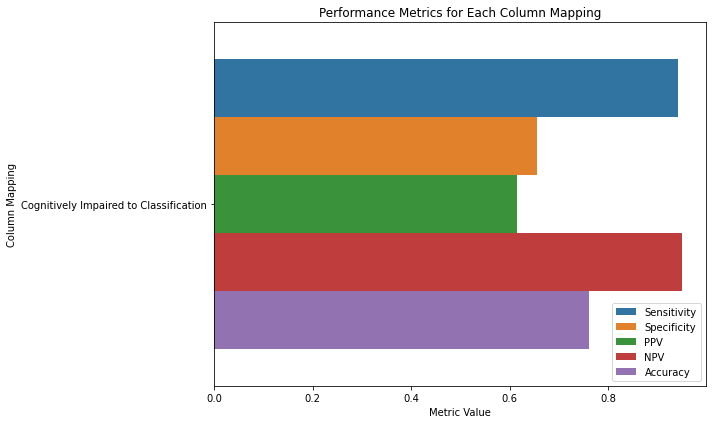

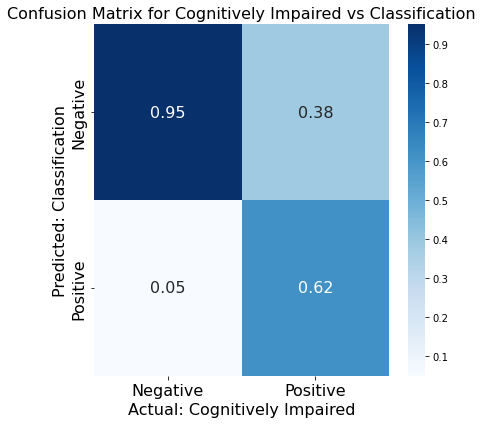

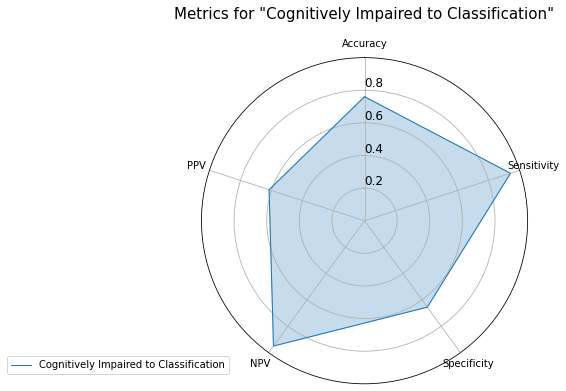

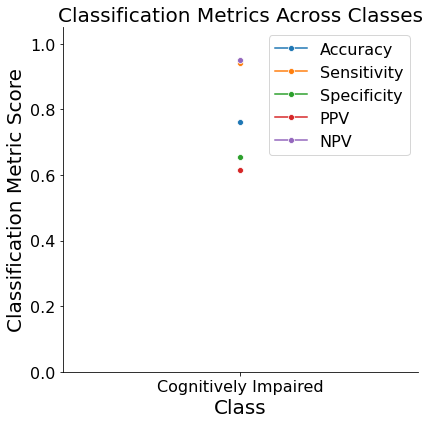

In [17]:
from calvin_utils.statistical_utils.classification_statistics import BinaryDataMetricsPlotter
plotter = BinaryDataMetricsPlotter(dataframe=data_df, mapping_dict=mapping_dict, specified_metrics=['Accuracy', 'Sensitivity', 'Specificity', 'NPV', 'PPV'], 
                                   out_dir=None, cm_normalization='pred')
plotter.run_plotting()

In [ ]:
plotter.convert_metrics_to_dataframe()

In [20]:
data_df.columns

Index(['Measurement', 'Cohort', 'Educational_Status_Coded',
       'Educational_Status', 'Employment_Status', 'Randomization_Group_Coded',
       'Age', 'Sex_Coded', 'Sex', 'Ethnicity_Coded', 'Ethnicity',
       'Cognitive_Exam', 'Cognitive Status', 'Cognitively Intact',
       'RoCA Score', 'Convolutional_Neural_Network_Equivalent', 'Weighted_Sum',
       'Cube_Predicted', 'Infinity_Predicted', 'Clock_Predicted',
       'Cube_Actual', 'Infinity_Actual', 'Clock_Actual', 'Cube Prediction',
       'Infinity Prediction', 'Clock Prediction', 'Cube Actual',
       'Infinity Actual', 'Clock Actual', 'Classification',
       'Cognitively Impaired'],
      dtype='object')

In [22]:
data_df.loc[:, ['Cognitively Intact', 'Cognitively Impaired', 'RoCA Score', 'Cognitive Status', 'Classification']]

,Cognitively Intact,Cognitively Impaired,RoCA Score,Cognitive Status,Classification
0,0,1,7,Impaired,1
1,0,1,4,Impaired,1
2,0,1,6,Impaired,1
3,0,1,6,Impaired,1
4,0,1,6,Impaired,1
5,1,0,8,Intact,0
6,1,0,8,Intact,0
7,0,1,6,Impaired,1
8,1,0,6,Intact,1
9,0,1,6,Impaired,1


# 03 - Evaluate a Binary Classifier

In [127]:
import os 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

class BinaryClassificationEvaluation:
    """
    Initializes the BinaryClassificationEvaluation with model results and the true outcomes.

    Args:
        fitted_model: The result object from a fitted statsmodels MNLogit model or similar.
        observation_df: A pandas DataFrame with the true class outcomes.
        normalization: Normalization method for the confusion matrix (None, 'true', 'pred', 'all').
        predictions_df: DataFrame of predicted probabilities or values.
        out_dir: Directory where plots and results will be saved.
        threshold: The threshold to classify probabilities into binary outcomes.
        positive_label: The label to be considered as the positive class. This is critical as the ROC curve calculations and thresholding will be based on this label.
    """
    def __init__(self, fitted_model=None, observation_df=None, normalization=None, predictions_df=None, out_dir=None, threshold=None, positive_label=1):
        self.results = fitted_model
        self.observation_df = observation_df
        self.normalization = normalization
        self.predictions_df = predictions_df
        self.out_dir = out_dir
        self.threshold = threshold
        self.positive_label = positive_label
        
    def find_optimal_threshold(self):
        """
        Calculates the optimal threshold using Youden's J statistic from an ROC curve.

        Returns:
            float: The optimal threshold based on Youden's J statistic.
        """
        if self.positive_label is None:
            self.positive_label = 1

        
        fpr, tpr, thresholds = roc_curve(y_true=self.observation_df, y_score=self.predictions_df, pos_label=self.positive_label)
        youden_j = tpr - fpr

        max_index = youden_j.argmax()
        optimal_threshold = thresholds[max_index]
        print("Optimal threshold by Youden's J: ", optimal_threshold)
        
        if optimal_threshold not in self.predictions_df.unique():
            print('----- \n WARNING: OPTIMAL THRESHOLD NOT IN OBSERVED SCORES. IF USING DISCRETE THRESHOLDS, THIS IS A PROBLEM AND SUGGESTS ARG:positive_label IS INCORRECT. \n')
        
        if self.threshold is None:
            self.threshold = optimal_threshold
        return optimal_threshold, youden_j


    def threshold_predictions(self, probabilities):
        """
        Converts probabilities into binary predictions based on the threshold.

        Args:
            probabilities: Array of predicted probabilities.

        Returns:
            Array of binary predictions.
        """
        print(f"Positive cases are being set to those under: {self.threshold}. \n Ensure this is logically sound.")
        return (probabilities < self.threshold).astype(int)

    def get_predictions(self):
        """
        Generates predictions from the fitted model or predictions DataFrame.
        """
        if self.predictions_df is not None:
            self.raw_predictions = self.predictions_df.to_numpy()
        else:
            self.raw_predictions = self.results.predict()
        self.predictions = self.threshold_predictions(self.raw_predictions)

    def get_observations(self):
        """
        Converts the observation DataFrame into a flattened array.
        """
        self.observations = self.observation_df.to_numpy().flatten()

    def calculate_confusion_matrix(self):
        """
        Calculates the confusion matrix from predictions and observations.
        """
        self.conf_matrix = confusion_matrix(self.observations, self.predictions, normalize=self.normalization)

    def extract_confusion_components(self):
        """
        Extracts True Positive, True Negative, False Positive, and False Negative counts from the confusion matrix.
        """
        self.TP = self.conf_matrix[1, 1]
        self.TN = self.conf_matrix[0, 0]
        self.FP = self.conf_matrix[0, 1]
        self.FN = self.conf_matrix[1, 0]

    def calculate_metrics(self):
        """
        Calculates accuracy, sensitivity, specificity, PPV, and NPV based on the confusion matrix components.
        """
        self.accuracy = (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)
        self.sensitivity = self.TP / (self.TP + self.FN)
        self.specificity = self.TN / (self.TN + self.FP)
        self.PPV = self.TP / (self.TP + self.FP)
        self.NPV = self.TN / (self.TN + self.FN)

    def display_metrics(self):
        print("Accuracy:", self.accuracy)
        print("Sensitivity:", self.sensitivity)
        print("Specificity:", self.specificity)
        print("PPV:", self.PPV)
        print("NPV:", self.NPV)

    def plot_confusion_matrix(self):
        """
        Plots a heatmap of the confusion matrix.
        """
        plt.figure(figsize=(6, 6))
        sns.heatmap(self.conf_matrix, annot=True, fmt=".2f", cmap="Blues")
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        plt.title("Confusion Matrix")
        if self.out_dir:
            os.makedirs(self.out_dir, exist_ok=True)
            plt.savefig(os.path.join(self.out_dir, "confusion_matrix.png"))
        plt.show()
        
    def bootstrap_confidence_intervals(self, n_bootstraps=1000, alpha=0.05):
        """
        Calculates confidence intervals for evaluation metrics using bootstrapping.

        Args:
            n_bootstraps: Number of bootstrap samples.
            alpha: Significance level for confidence intervals.

        Returns:
            dict: Confidence intervals for AUC, accuracy, sensitivity, specificity, PPV, and NPV.
        """
        np.random.seed(42)  # For reproducibility
        bootstrapped_metrics = {
            'auc': [],
            'accuracy': [],
            'sensitivity': [],
            'specificity': [],
            'ppv': [],
            'npv': []
        }

        data = pd.DataFrame({'observations': self.observations, 'predictions': self.predictions, 'raw_predictions': self.raw_predictions.flatten()})
        
        for _ in range(n_bootstraps):
            bootstrap_sample = data.sample(n=len(data), replace=True)
            y_true = bootstrap_sample['observations'].to_numpy()
            y_pred = bootstrap_sample['predictions'].to_numpy()
            y_scores = bootstrap_sample['raw_predictions'].to_numpy()
            
            # AUC
            fpr, tpr, _ = roc_curve(y_true, y_scores, pos_label=self.positive_label)
            roc_auc = auc(fpr, tpr)
            bootstrapped_metrics['auc'].append(roc_auc)
            
            # Confusion matrix and derived metrics
            conf_matrix = confusion_matrix(y_true, y_pred)
            TP = conf_matrix[1, 1]
            TN = conf_matrix[0, 0]
            FP = conf_matrix[0, 1]
            FN = conf_matrix[1, 0]

            accuracy = (TP + TN) / (TP + TN + FP + FN)
            sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
            specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
            ppv = TP / (TP + FP) if (TP + FP) > 0 else 0
            npv = TN / (TN + FN) if (TN + FN) > 0 else 0

            bootstrapped_metrics['accuracy'].append(accuracy)
            bootstrapped_metrics['sensitivity'].append(sensitivity)
            bootstrapped_metrics['specificity'].append(specificity)
            bootstrapped_metrics['ppv'].append(ppv)
            bootstrapped_metrics['npv'].append(npv)
            
        self.bootstrapped_metrics = bootstrapped_metrics
        confidence_intervals = {}
        for metric in bootstrapped_metrics:
            sorted_metrics = np.sort(bootstrapped_metrics[metric])
            lower_bound = np.percentile(sorted_metrics, alpha / 2 * 100)
            upper_bound = np.percentile(sorted_metrics, (1 - alpha / 2) * 100)
            confidence_intervals[metric] = (lower_bound, upper_bound)
        return confidence_intervals
    
    def calculate_p_values(self, random_classifier_metrics):
        """
        Calculates p-values for bootstrapped metrics compared to the random classifier's metrics.

        Args:
            bootstrapped_metrics: Dictionary containing lists of bootstrapped metric values.
            random_classifier_metrics: Dictionary containing the random classifier's metric values.

        Returns:
            dict: P-values for each metric.
        """
        p_values = {}
        for metric in self.bootstrapped_metrics:
            metric_values = self.bootstrapped_metrics[metric]
            random_value = random_classifier_metrics[metric]
            p_value = np.mean(np.array(metric_values) < random_value)
            p_values[metric] = p_value
        return p_values
    def run(self):
        """
        Orchestrates the calculation and display of all evaluation metrics.
        """
        self.find_optimal_threshold()
        self.get_predictions()
        self.get_observations()
        self.calculate_confusion_matrix()
        self.extract_confusion_components()
        self.calculate_metrics()
        self.display_metrics()
        self.plot_confusion_matrix()


Optimal threshold by Youden's J:  8
Positive cases are being set to those under: 8. 
 Ensure this is logically sound.
Accuracy: 0.7826923076923077
Sensitivity: 0.9248554913294798
Specificity: 0.7118155619596542
PPV: 0.6153846153846154
NPV: 0.95


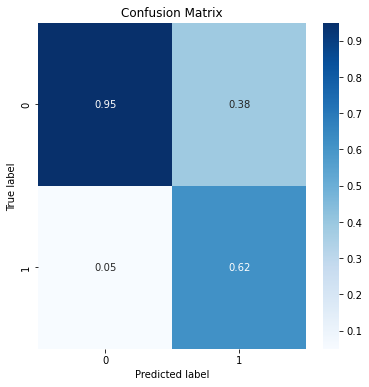

In [128]:
# def __init__(self, fitted_model=None, observation_df=None, normalization=None, predictions_df=None, out_dir=None, threshold=0.5):
bce = BinaryClassificationEvaluation(fitted_model=None, normalization='pred', 
                                     predictions_df=data_df['RoCA Score'], observation_df=data_df['Cognitively Impaired'], 
                                     threshold=None, positive_label=0)
bce.run()

Derive the Optimal Threshold and Derive Classification Metrics

In [129]:
# Get confidence intervals
confidence_intervals = bce.bootstrap_confidence_intervals()
print("Confidence Intervals:", confidence_intervals)

Confidence Intervals: {'auc': (0.6713887980108617, 0.9093915696950285), 'accuracy': (0.6304347826086957, 0.8913043478260869), 'sensitivity': (0.8092857142857143, 1.0), 'specificity': (0.4814444444444444, 0.8333333333333334), 'ppv': (0.42857142857142855, 0.8064826302729527), 'npv': (0.8421052631578947, 1.0)}


Get P-Values
- The dictionary of random classifier baselines are provided in section 05
    - {'Sensitivity': 0, 'Specificity': 0.5, 'Precision': 0.0, 'PPV': 0.0, 'NPV': 1.0, 'Accuracy': 0.5}

In [130]:
random_baseline = {'Sensitivity': 0, 'Specificity': 0.5, 'Precision': 0.0, 'PPV': 0.0, 'NPV': 1.0, 'Accuracy': 0.5}

In [137]:
random_baseline = {'sensitivity': 0, 'specificity': 0.5,  'ppv': 0.0, 'npv': 0.63, 'accuracy': 0.5, 'auc': 0.5}
bce.calculate_p_values(random_baseline)

{'auc': 0.0,
 'accuracy': 0.0,
 'sensitivity': 0.0,
 'specificity': 0.036,
 'ppv': 0.0,
 'npv': 0.0}

# 04 - Evaluate a Multiclass Classifier
- If you have ground truths and some sort of continuous variable which can be used for classification, this will help you visualize that.
```
Args:
    fitted_model: The result object from a fitted statsmodels MNLogit model.
    outcome_matrix: A pandas DataFrame with the true class outcomes in one-hot encoded format.
    normalization: Normalization method for the confusion matrix (None, 'true', 'pred', 'all').
    predictions_df: Manually entered DataFrame of predictions, can contain probabilities or dummy-coded predictions.
    thresholds (dict): a dictionary mapping the index of the threshold to the probability threshold to make that classification. 
    assign_labels (bool): Scipy's confusion matrix orders by minimum to maximum occurence of the predictions. It will output the confusion matrix by this. 
            If set to False, we will organize our confusion matrix as per scipy's order. 
```
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

If you do not have predictions and observations organized as:
```
Observations (columns are a given classificaiton)
    [[0, 1, 0, 0],
      1, 0 ,0 ,0]]
predictions (columns are a given classification, value is the p(class))      
    It will expect predictions dataframeto take the form where prediction for a given classificition is an array of probability:
    [[0.2, 0.7, 0.1, 0.0],
      0.9, 0.05, 0.05, 0.0]]
```
then shape them here:

In [ ]:
data_df.columns

In [ ]:
import pandas as pd
def create_observations_df(df, outcome_column):
    # One-hot encode the binary outcomes
    observations_df = pd.get_dummies(df[outcome_column])
    return observations_df

def create_predictions_df(df, probability_column):
    # Assuming binary classification, the probability of the negative class is 1 minus the probability of the positive class
    predictions_df = pd.DataFrame({
        0: 1 - df[probability_column],
        1: df[probability_column]
    })
    return predictions_df
observations_df = create_observations_df(data_df, 'Cognitive_Status')
predictions_df = create_predictions_df(data_df, 'Ensemble')
observations_df = observations_df.iloc[:, [1]]
predictions_df = predictions_df.iloc[:, [1]]

In [ ]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC, MulticlassClassificationEvaluation, MicroAverageROC
evaluator = MulticlassClassificationEvaluation(fitted_model=None, observation_df=observations_df, predictions_df=predictions_df, normalization='pred',
                                     thresholds=None, out_dir=out_dir)
evaluator.run()

# 04 - Evaluate a Random Classifier
- Set the mapping_dict so keys are columns and values are the positive hits

In [169]:
data_df.columns

Index(['Measurement', 'Cohort', 'Educational_Status_Coded',
       'Educational_Status', 'Employment_Status', 'Randomization_Group_Coded',
       'Age', 'Sex_Coded', 'Sex', 'Ethnicity_Coded', 'Ethnicity',
       'Cognitive_Exam', 'Cognitive Status', 'Cognitively Intact',
       'RoCA Score', 'Convolutional_Neural_Network_Equivalent', 'Weighted_Sum',
       'Cube_Predicted', 'Infinity_Predicted', 'Clock_Predicted',
       'Cube_Actual', 'Infinity_Actual', 'Clock_Actual', 'Cube Prediction',
       'Infinity Prediction', 'Clock Prediction', 'Cube Actual',
       'Infinity Actual', 'Clock Actual', 'Classification', 'test',
       'Cognitively Impaired', 'pred_optimal', 'manual_pred', 'pred',
       'pred_optimal_manual'],
      dtype='object')

In [173]:
mapping_dict = {'Cube_Predicted':'Correct'}

In [174]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from calvin_utils.statistical_utils.classification_statistics import BinaryDataMetricsPlotter

class EvaluateRandomClassifier(BinaryDataMetricsPlotter):
    def __init__(self, dataframe, mapping_dict, out_dir=None, cm_normalization=None, n_classes=2):
        '''
        mapping_dict (dict): a dicitonary where keys represent the column with observed classes. Keys are the observation corresponding to a hit. 
        '''
        self.dataframe = dataframe
        self.mapping_dict = mapping_dict
        self.specified_metrics = None
        self.save_dir = out_dir
        self.n_classes=n_classes
        self.metrics = self.calculate_metrics()
        self.confusion_matrices = self.get_confusion_matrices(normalize=cm_normalization)
        
    def calculate_metrics(self):
        metrics = {}
        for class_col, positive_class in self.mapping_dict.items():
            if len(self.dataframe[class_col].unique()) != 2:
                raise ValueError("Only 2 classes acceptable in this class. Do not pass columns with more than 2 classes.")
            tp = 1/self.n_classes * (self.dataframe[class_col]==positive_class).sum() / (self.dataframe[class_col]).count()
            tn = (1 - 1/self.n_classes) * (self.dataframe[class_col]!=positive_class).sum() / (self.dataframe[class_col]).count()
            fp = 1/self.n_classes * (self.dataframe[class_col]!=positive_class).sum() / (self.dataframe[class_col]).count()
            fn = (1 - 1/self.n_classes) * (self.dataframe[class_col]==positive_class).sum() / (self.dataframe[class_col]).count()
            
            sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
            ppv = tp / (tp + fp) if (tp + fp) != 0 else 0  # Positive Predictive Value
            npv = tn / (tn + fn) if (tn + fn) != 0 else 0  # Negative Predictive Value
            acc = (tp + tn) / (tp + tn + fp + fn)
            precision = tp / (tp + fp) if (tp + fp) != 0 else 0
            recall = sensitivity  # Recall is the same as sensitivity
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

            metrics[class_col] = {
                'Sensitivity': sensitivity,
                'Specificity': specificity,
                'Precision': precision,
                'PPV': ppv,
                'NPV': npv,
                'Accuracy': acc,
                'F1 Score': f1,
                'TP': tp,
                'TN': tn,
                'FP': fp,
                'FN': fn
            }
            
        return metrics
    
    def get_confusion_matrices(self, normalize=None):
        confusion_matrices = {}
        for class_col in self.mapping_dict.keys():
            tp = self.metrics[class_col]['TP']
            tn = self.metrics[class_col]['TN']
            fp = self.metrics[class_col]['FP']
            fn = self.metrics[class_col]['FN']
            cm = np.array([[tn, fp], [fn, tp]])
            if normalize == 'true':
                cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            elif normalize == 'pred':
                cm = cm.astype('float') / cm.sum(axis=0)[np.newaxis, :]
            elif normalize == 'all':
                cm = cm.astype('float') / cm.sum()
            else: 
                pass
            confusion_matrices[class_col] = cm
        return confusion_matrices
    
    def plot_confusion_matrices(self):
        confusion_matrices = self.confusion_matrices
        num_matrices = len(confusion_matrices)
        fig, axes = plt.subplots(1, num_matrices, figsize=(6 * num_matrices, 6))
        
        if num_matrices == 1:
            axes = [axes]
            
        for ax, (class_col, cm) in zip(axes, confusion_matrices.items()):
            sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', ax=ax,
                        xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'],
                        annot_kws={"size": 16})  # Set annotation font size
            ax.set_xlabel(f'Predicted: {self.mapping_dict[class_col]}', fontsize=16)
            ax.set_ylabel(f'Actual: {class_col}', fontsize=16)
            ax.set_title(f'Confusion Matrix for {class_col} vs {self.mapping_dict[class_col]}', fontsize=16)
            ax.tick_params(axis='both', which='major', labelsize=16)
            
        if self.save_dir is not None:
            subdir = "confusion_matrix"
            os.makedirs(os.path.join(self.save_dir, subdir), exist_ok=True)
            file_name_svg = "conf_matrix.svg"
            path_svg = os.path.join(self.save_dir, subdir, file_name_svg)
            plt.savefig(path_svg, format='svg')
            
        plt.tight_layout()
        plt.show()
        
    def visualize_probability_influence(self):
        """
        Visualize how the predicted probabilities influence the random classifier.
        """
        for class_col, metrics in self.metrics.items():
            # Extract the required metrics
            tp = int(metrics['TP'])
            tn = int(metrics['TN'])
            fp = int(metrics['FP'])
            fn = int(metrics['FN'])

            # Simulate probabilities based on the metric values
            total = tp + tn + fp + fn
            pred_prob = np.random.rand(total)
            true_prob = np.concatenate((
                np.repeat(1, tp + fn),  # True positives and false negatives
                np.repeat(0, tn + fp)   # True negatives and false positives
            ))

            # Simulate true labels based on probabilities
            true_labels = np.concatenate((
                np.repeat(1, tp), np.repeat(0, fn),
                np.repeat(0, tn), np.repeat(1, fp)
            ))

            # Determine predicted labels based on a threshold of 0.5 for visualization purposes
            pred_labels = (pred_prob > 0.5).astype(int)

            plt.figure(figsize=(12, 8))

            # Determine color based on correct classification
            correct_classification = true_labels == pred_labels
            colors = np.array(sns.color_palette("tab10"))[correct_classification.astype(int)]

            # Scatter plot
            scatter = plt.scatter(pred_prob, true_prob, c=colors, alpha=0.6, edgecolor='w', linewidth=0.5)

            # Colorbar settings
            cbar = plt.colorbar(scatter, boundaries=[0, 0.5, 1], ticks=[0.25, 0.75])
            cbar.set_ticklabels(['Incorrect', 'Correct'])
            cbar.set_label('Classification Result', fontsize=12)

            # Plot settings
            plt.xlabel("Predicted Probability of Positive Class", fontsize=14)
            plt.ylabel("True Probability of Positive Class", fontsize=14)
            plt.title(f"Probability Influence on Random Classifier for {class_col}", fontsize=16)

            # Grid and layout settings
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()

            # Show the plot
            if self.save_dir is not None:
                subdir = "probability_influence"
                os.makedirs(os.path.join(self.save_dir, subdir), exist_ok=True)
                file_name_svg = f"{class_col}_probability_influence.svg"
                path_svg = os.path.join(self.save_dir, subdir, file_name_svg)
                plt.savefig(path_svg, format='svg')

            plt.show()

    def plot_radar_charts(self):
        if self.specified_metrics is None:
            self.specified_metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV']
        
        color_map = sns.color_palette("tab10", len(self.mapping_dict))

        for idx, (class_col, metric_values) in enumerate(self.metrics.items()):
            plt.figure(figsize=(6, 6))
            ax = plt.subplot(111, polar=True)

            categories = self.specified_metrics
            N = len(categories)

            angles = [n / float(N) * 2 * pi for n in range(N)]
            angles += angles[:1]

            ax.set_theta_offset(pi / 2)
            ax.set_theta_direction(-1)

            plt.xticks(angles[:-1], categories)

            ax.set_rlabel_position(0)
            plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="black", size=12)
            plt.ylim(0, 1)

            values = [metric_values[metric] for metric in self.specified_metrics]
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'{class_col}', color=color_map[idx % len(color_map)])
            ax.fill(angles, values, alpha=0.25, color=color_map[idx % len(color_map)])

            plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
            plt.title(f'Metrics for "{class_col}"', size=15, color='black', y=1.1)

            if self.save_dir is not None:
                radar_plots_subdir = "radar_plots"
                os.makedirs(os.path.join(self.save_dir, radar_plots_subdir), exist_ok=True)
                file_name_svg = f"{class_col}_radar.svg"
                path_svg = os.path.join(self.save_dir, radar_plots_subdir, file_name_svg)
                plt.savefig(path_svg, format='svg')
            plt.show()

            plt.close()

    def run(self):
        self.plot_confusion_matrices()
        self.plot_radar_charts()
        self.visualize_probability_influence()


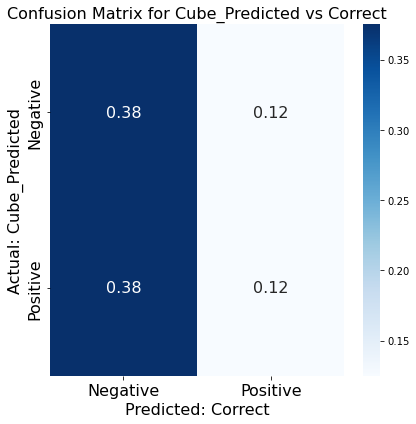

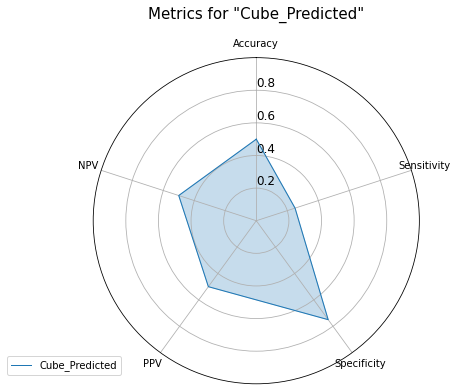

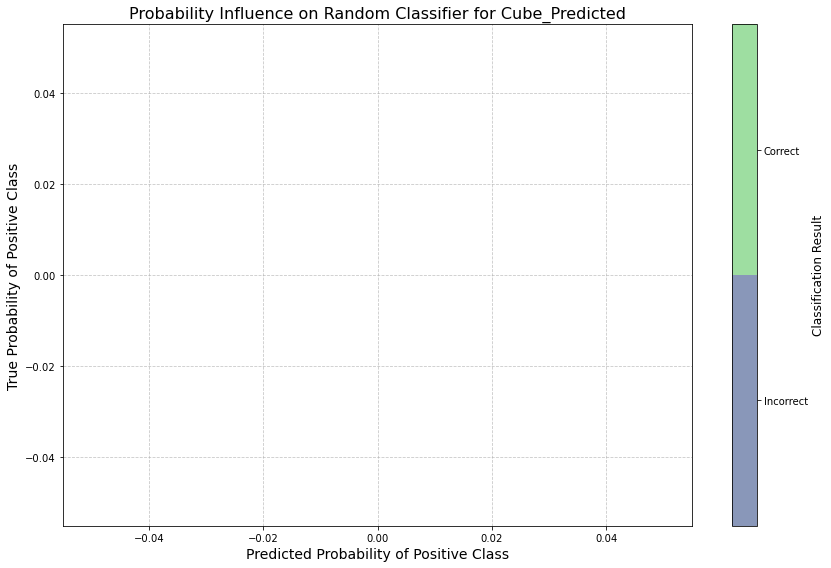

{'Cube_Predicted': {'Sensitivity': 0.25, 'Specificity': 0.75, 'Precision': 0.5, 'PPV': 0.5, 'NPV': 0.5, 'Accuracy': 0.5, 'F1 Score': 0.3333333333333333, 'TP': 0.125, 'TN': 0.375, 'FP': 0.125, 'FN': 0.375}}


In [175]:
random_classifier = EvaluateRandomClassifier(dataframe=data_df, mapping_dict=mapping_dict, out_dir=None, cm_normalization=None,
                                                    n_classes=4)
random_classifier.run()
print(random_classifier.metrics)


# 05 - Scatterplot a Value to a Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Define logistic function
def logistic_function(x, beta_0, beta_1):
    return expit(beta_0 + beta_1 * x)

# Function to create scatter plot and fit sigmoid using logistic regression
def plot_with_logistic_regression(df, dv_col, iv_col):
    # Extract data
    x = df[iv_col].values.reshape(-1, 1)
    y = df[dv_col].values

    # Normalize the dependent variable to be between 0 and 1
    y_min, y_max = y.min(), y.max()
    y_normalized = (y - y_min) / (y_max - y_min)

    # Fit logistic regression model
    model = LogisticRegression()
    model.fit(x, y_normalized)

    # Create fitted sigmoid curve data
    x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_fit = logistic_function(x_fit, model.intercept_[0], model.coef_[0][0])
    
    # Create a JointGrid for the scatter plot and KDEs
    g = sns.JointGrid(x=df[iv_col], y=y_normalized, space=0, height=8, ratio=5)
    g.plot_joint(sns.scatterplot, color="tab:blue", alpha=0.6)
    g.plot_joint(plt.plot, x_fit, y_fit, color='blue', label='Logistic Fit')
    g.plot_marginals(sns.kdeplot, fill=True, color='tab:blue')

    # Labels and title
    g.set_axis_labels(iv_col, f'Normalized {dv_col}', fontsize=14)
    plt.suptitle(f'Scatter Plot with Logistic Regression Fit and KDE: {iv_col} vs {dv_col}', fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)

    # # Show the plot
    # plt.show()

    # Plot
    # plt.figure(figsize=(6, 6))
    # sns.scatterplot(x=x.flatten(), y=y_normalized, palette="tab10", label=None)
    # plt.plot(x_fit, y_fit, color='blue', label='Logistic Fit')



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
import os
# Define logistic function
def logistic_function(x, beta_0, beta_1):
    return expit(beta_0 + beta_1 * x)

# Function to create scatter plot and fit sigmoid using logistic regression with KDE plots
def plot_with_logistic_regression_and_kde(df, dv_col, iv_col, xlim=None, ylim=None, out_dir=None):
    # Extract data
    x = df[iv_col].values.reshape(-1, 1)
    y = df[dv_col].values

    # Normalize the dependent variable to be between 0 and 1
    y_min, y_max = y.min(), y.max()
    y_normalized = (y - y_min) / (y_max - y_min)

    # Fit logistic regression model
    model = LogisticRegression()
    model.fit(x, y_normalized)

    # Create fitted sigmoid curve data
    x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    y_fit = logistic_function(x_fit, model.intercept_[0], model.coef_[0][0])

    # Create a JointGrid for the scatter plot and KDEs
    g = sns.JointGrid(x=df[iv_col], y=y_normalized, space=0, height=8, ratio=5)
    g.plot_joint(sns.scatterplot, alpha=0.6)
    g.plot_marginals(sns.kdeplot, fill=True, color='tab:blue')
    
    # Plot the logistic fit line separately
    g.ax_joint.plot(x_fit, y_fit, color='blue', label='Logistic Fit')

    # Labels and title
    g.set_axis_labels(iv_col, f'{dv_col}', fontsize=16)
    plt.suptitle(f'Scatter Plot with Logistic Regression Fit and KDE:\n{iv_col} vs {dv_col}', fontsize=20)

    # plt.subplots_adjust(top=0.95)
    
    # Labels and title
    plt.tight_layout()
    plt.yticks([0,1])
    if xlim:
        g.ax_joint.set_xlim(xlim)
    if ylim:
        g.ax_joint.set_ylim(ylim)

    # Show the plot
    if out_dir is not None:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(os.path.join(out_dir, 'sigmoid_scatter.svg'))
    plt.show()


In [ ]:
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/roca/figures/cognitive_classifier/clock'

In [ ]:
data_df.columns

In [ ]:
plot_with_logistic_regression_and_kde(data_df, dv_col='Cognitively Intact', iv_col='Clock Prediction', ylim=(-0.05, 1.05), xlim=(-0.05,1.05), out_dir=out_dir)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create jitter plot with KDE plots
def plot_jitter_with_kde(df, category_col, value_col):
    # Create a FacetGrid
    g = sns.FacetGrid(df, col=category_col, col_wrap=4, sharex=False, sharey=False, height=4)
    
    # Map the stripplot (jitter plot) to the FacetGrid
    g.map(sns.stripplot, value_col, jitter=True, alpha=0.6, color="tab:blue")
    
    # Map the KDE plot to the FacetGrid
    g.map(sns.kdeplot, value_col, fill=True, color="tab:blue", alpha=0.6)
    
    # Adjust the layout
    g.set_axis_labels(value_col, '')
    g.set_titles(col_template='{col_name}')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Jitter Plot with KDE: {value_col} across {category_col}', fontsize=16)

    # Show the plot
    plt.show()

plot_jitter_with_kde(data_df, 'Cognitively Intact', 'Clock Prediction')
